In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_46/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<img src='../../../common/logo_DH.png' align='left' width=35%/>

# Checkpoint Preprocesamiento en Text Mining.

En esta práctiva vamos a usar el dataset de mails que ya usamos en la clase de Naive Bayes.

Este dataset (<a href="https://www.kaggle.com/riyadhrazzaq/multinomial-naive-bayes-from-scratch/data?select=spam.csv" traget="_blank">fuente</a>) tiene dos columnas:

* una columna con el cuerpo del mail, 

* y otra con la etiqueta spam / ham según corresponda a un mail que es spam o no respectivamente.

Vamos a preprocesar los textos de los mails usando `CountVectorizer` y `TfidfTransformer` y comparar las representaciones obtenidas.


## Imports

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import seaborn as sns
import matplotlib.pyplot as plt

## Ejercicio 1

Leer los datos del archivo `spam.csv`. 

Mantener sólo las columnas 1 y 2 etiquetarlas como 'target' y 'text'

Ayuda: usar `encoding='iso8859_14'`

In [7]:
df = pd.read_csv('../Data/spam.csv', encoding='iso8859_14')
df = df[['v1','v2']]

In [37]:
df.columns = ['target', 'text']

In [38]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Ejercicio 2

Los textos del dataset están en idioma inglés.

Construir una lista de stems de stopwords usando `SnowballStemmer`



In [20]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [23]:
# nltk.download('stopwords')
from nltk.corpus import stopwords 

stopwords = stopwords.words('english') #instancio las stopwords
Stemmer=SnowballStemmer("english") #instancio mi stemmer en idioma ingles

stopwords_en_stem = [Stemmer.stem(x) for x in stopwords] # Ingreso mis stopwords para stemizar


Generar una instancia de DataFrame resultado de aplicar CountVectorizer a los textos de los mails, usando como stopwords la lista resultado del paso anterior.

In [40]:
vectorizer =\
CountVectorizer(stop_words = stopwords_en_stem, lowercase = True, strip_accents = 'unicode')
vectorizer.fit(df.text) # lo entreno con mi columna X ("text")


CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'our',
                            'ourselv', 'you', "you'r", "you'v", "you'll",
                            "you'd", 'your', 'your', 'yourself', 'yourselv',
                            'he', 'him', 'his', 'himself', 'she', 'she', 'her',
                            'her', 'herself', 'it', 'it', 'it', 'itself', ...],
                strip_accents='unicode')

In [42]:
# print('Vocabulario:\n',vectorizer.vocabulary_) # se creo el vocabulario al fitearlo


In [52]:
countvectorizer_encoding = vectorizer.transform(df.text);
countvectorizer_encoding

<5572x8557 sparse matrix of type '<class 'numpy.int64'>'
	with 48358 stored elements in Compressed Sparse Row format>

In [54]:
countvectorizer_df = pd.DataFrame(countvectorizer_encoding.todense(), columns = vectorizer.get_feature_names())
countvectorizer_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ejercicio 3

A partir del encoding resultado de CountVectorizer, generar una instancia de DataFrame resultado de aplicar TfidfTransformer.


In [56]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

# TfidfTransformer sirve para transformar una matriz generada por CountVectorizer(). 
# Podemos saltearnos el uso de countvectorizer y usar directamente TfidfVectorizer.

Tfidf_encoding = TfidfTransformer().fit_transform(countvectorizer_encoding)

Tfidf_encoding

<5572x8557 sparse matrix of type '<class 'numpy.float64'>'
	with 48358 stored elements in Compressed Sparse Row format>

In [63]:
Tfidf_df = pd.DataFrame(Tfidf_encoding.todense(), columns = vectorizer.get_feature_names())

Tfidf_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ejercicio 4

Comprobemos que los valores de la representación resultado de CountVectorizer tienen rango de valores disímiles, y distintos a la representación obtenida con TfidfTransformer

Para eso grafiquemos

1. Mediante un scatterplot los valores medios de cada palabra de la representación resultado de CountVectorizer.

2. Mediante un scatterplot los valores medios de cada palabra de la representación resultado de TfidfTransformer.

3. Mediante `errorbar` https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html, 
    
    en el eje x los valores medios de CountVectorizer de cada palabra 
    en el eje y los valores medios de TfidfTransformer de cada palabra 
    como error x los desvíos estándar de CountVectorizer de cada palabra 
    como error y los desvíos estándar de TfidfTransformer de cada palabra 
    
Obervemos que, tal como esperamos, la dispersión es mayor en el eje x (CountVectorizer) que en el eje y (TfidfTransformer)

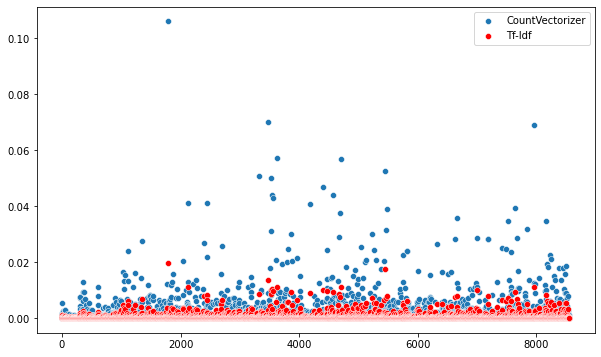

In [118]:
%matplotlib inline
plt.figure(figsize=(10,6))

countvectorizer_means=[countvectorizer_df[col].mean() for col in countvectorizer_df.columns]
sns.scatterplot(x = range(len(countvectorizer_means)) ,y = countvectorizer_means)


Tfidf_means=[Tfidf_df[col].mean() for col in Tfidf_df.columns]
sns.scatterplot(x = range(len(Tfidf_means)) ,y = Tfidf_means, color = 'r')

plt.legend(['CountVectorizer','Tf-Idf'])
plt.show()

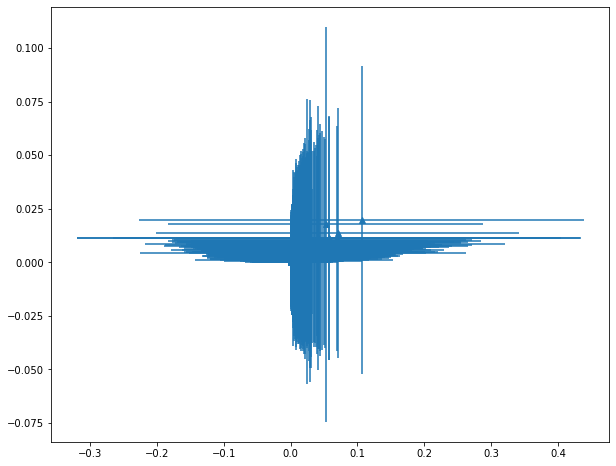

In [123]:
plt.figure(figsize = (10,8))
countVectorizer_sd = [np.std(countvectorizer_df[col]) for col in countvectorizer_df.columns]
tfidf_sd = [np.std(Tfidf_df[col]) for col in Tfidf_df.columns]


plt.errorbar(x=countvectorizer_means, y=Tfidf_means, yerr = tfidf_sd, xerr = countVectorizer_sd, linestyle='None', marker='^')
plt.show()